# **Analisis Data Covid-19 Jakarta dan Indonesia**
*by Georhapsody | Submisi Data Science Academy Compfest 15*

# **Daftar Isi**

1.   [Pendahuluan](#Pendahuluan)
2.   [Rumusan Masalah](#Rumusan-Masalah)
3.   [Hipotesis](#Hipotesis)
4.   [Metodologi](#Metodologi)
5.   [Data Preparation](#Data-Preparation)
5.   [Data Profiling](#Data-Profiling)
7.   [Data Cleansing](#Data-Cleansing)
8.   [Feature Engineering](#Feature-Engineering)
9.   [Exploratory Data Analysis](#Exploratory-Data-Analysis)
10.  [Analisis Lanjutan](#Analisis-Lanjutan)
11.  [Kesimpulan dan Rekomendasi](#Kesimpulan-dan-Rekomendasi)

# **Pendahuluan**

Pandemi Covid-19 memberikan dampak yang besar pada berbagai lini kehidupan masyarakat. Untuk menangani pandemi ini, pemerintah di telah melakukan berbagai upaya, seperti membentuk gugus tugas dan memberlakukan pembatasan aktivitas masyarakat berskala nasional.

Meski telah dilakukan berbagai upaya, kita telah banyak mendengar jumlah masyarakat yang terinfeksi dan meninggal akibat Covid-19 masih sangat banyak. Selain itu, perekonomian dan tingkat mobilitas masyarakat juga terkena dampak buruk kebijakan pemerintah terhadap pandemi. 

Apakah kebijakan yang diambil pemerintah untuk menekan pandemi telah tepat? Apa saja efek akibat kebijakan seperti PPKM terhadap angka Covid-19, perekonomian, atau tingkat mobilitas masyarakat? Apakah kebijakan PPKM diberlakukan terlambat atau tepat waktu? Diperlukan analisis terhadap data-data untuk menjawab persoalan tersebut.

# **Rumusan Masalah**
1. Bagaimana tren angka Covid-19 di DKI Jakarta?
2. Bagaimana tren angka Covid-19 nasional?
3. Bagaimana efektivitas kebijakan PPKM dalam menekan angka Covid-19?
4. Bagaimana efek kebijakan PPKM Covid-19 terhadap PDB nasional?
5. Bagaimana efek kebijakan PPKM Covid-19 terhadap tingkat mobilitas masyarakat?

# **Hipotesis**
1. Kebijakan PPKM efektif dan tepat waktu ditandai dengan menurunnya angka Covid-19 tidak lama setelah diberlakukan.
2. Kebijakan PPKM berdampak negatif terhadap angka PDB nasional.
3. Kebijakan PPKM berdampak negatif pada tingkat mobilitas masyarakat.

# **Metodologi**

Dalam menentukan hubungan antarvariabel serta menentukan pola dalam data, akan digunakan analisis statistik. Untuk menentukan pola serta prediksi pada, dilakukan regresi polinomial.

# **Data Preparation**

Dalam analisis ini digunakan *dataset* Covid-19, PDB, serta mobilitas nasional. Data telah diproses terlebih dahulu, seperti konversi ke .csv dan koreksi format data, sebelum dianalisis.

Seluruh *dataset* kemudian dimuat ke dalam *dataframe*. Ubah data tanggal sebagai *index*.

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data Covid-19
df_covid_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-covid-data.csv",
                          na_values="nan", keep_default_na=False)

# Import data PDB Indonesia
df_PDB_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-PDB-data.csv")

# Import data mobility Indonesia 2020, 2021, dan 2022
mob_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2020_mobility_report.csv")
mob_2021 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2021_mobility_report.csv")
mob_2022 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2022_mobility_report.csv")
df_mobility_raw = pd.concat([mob_2020, mob_2021, mob_2022], axis=0)

In [245]:
# Set tanggal sebagai index
df_covid_raw = df_covid_raw.set_index("Tanggal")

# Set tahun sebagai index
df_PBD_raw = df_PDB_raw.set_index("tahun")

# Set tanggal sebagai index
df_mobility_raw = df_mobility_raw.set_index("date")

# **Data Profiling**

Cek deskripsi statistik data, *datatypes*, dan *missing values* pada data.

In [249]:
# Cek datatypes data Covid
print("Datatypes data Covid-19")
print(df_covid_raw.dtypes)

# Cek missing values data Covid
print("\nMissing values data Covid-19")
print(df_covid_raw.isna().sum())

# Deskripsi statistik data Covid
print("\nDeskripsi statistik data Covid-19")
df_covid_raw.describe()

Datatypes data Covid-19
Positif (Indonesia)                object
Dirawat (Indonesia)                object
Sembuh (Indonesia)                 object
Meninggal (Indonesia)              object
Meninggal (Jakarta)                object
Sembuh (Jakarta)                   object
Self-Isolation (Jakarta)           object
Dirawat (Jakarta)                  object
Positif (Jakarta)                  object
Positif Aktif (Jakarta)            object
Positif Harian (Indonesia)         object
Dirawat Harian (Indonesia)         object
Sembuh Harian (Indonesia)          object
Meninggal Harian (Indonesia)       object
Meninggal Harian (Jakarta)          int64
Sembuh Harian (Jakarta)            object
Self-Isolation Harian (Jakarta)    object
Dirawat Harian (Jakarta)           object
Positif Harian (Jakarta)           object
Positif Aktif Harian (Jakarta)     object
dtype: object

Missing values data Covid-19
Positif (Indonesia)                0
Dirawat (Indonesia)                0
Sembuh (Indonesia)

,Meninggal Harian (Jakarta)
count,1218.000000
mean,13.230706
std,24.486412
min,0.000000
25%,1.000000
50%,4.000000
75%,17.000000
max,265.000000


In [250]:
# Cek datatypes data PDB
print("Datatypes data PDB")
print(df_PDB_raw.dtypes)

# Cek missing values data Covid
print("\nMissing values data PDB")
print(df_PDB_raw.isna().sum())

# Deskripsi statistik data Covid
print("\nDeskripsi statistik data PDB")
df_PDB_raw.describe()

Datatypes data PDB
tahun                        int64
triwulan                    object
PDB_harga_konstan          float64
perubahan_harga_konstan    float64
PDB_harga_berlaku          float64
perubahan_harga_berlaku    float64
dtype: object

Missing values data PDB
tahun                      0
triwulan                   0
PDB_harga_konstan          0
perubahan_harga_konstan    0
PDB_harga_berlaku          0
perubahan_harga_berlaku    0
dtype: int64

Deskripsi statistik data PDB


,tahun,PDB_harga_konstan,perubahan_harga_konstan,PDB_harga_berlaku,perubahan_harga_berlaku
count,16.000000,1.600000e+01,16.000000,1.600000e+01,16.000000
mean,2020.500000,2.781414e+06,0.813125,4.240072e+06,1.935000
std,1.154701,1.149328e+05,2.611331,4.533270e+05,3.544047
min,2019.000000,2.589769e+06,-4.190000,3.690742e+06,-5.930000
25%,2019.750000,2.708048e+06,-0.932500,3.929395e+06,0.055000
50%,2020.500000,2.771408e+06,0.705000,4.042982e+06,1.830000
75%,2021.250000,2.826015e+06,3.112500,4.501094e+06,4.170000
max,2022.000000,2.988636e+06,5.050000,5.114911e+06,8.640000


In [251]:
# Cek datatypes data mobility
print("Datatypes data mobility")
print(df_mobility_raw.dtypes)

# Cek missing values data Covid
print("\nMissing values data mobility")
print(df_mobility_raw.isna().sum())

# Deskripsi statistik data Covid
print("\nDeskripsi statistik data mobility")
df_mobility_raw.describe()

Datatypes data mobility
country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                          float64
metro_area                                            float64
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline                 int64
residential_percent_change_from_baseline                int64
dtype: object

Missing values data mobility
country_region_code                                       0
coun

,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,0.0,0.0,34040.000000,33991.000000,33972.000000,33136.000000,34090.000000,34090.000000
mean,NaN,NaN,NaN,-2.459577,19.943014,8.535088,-19.133752,-10.586360,7.224083
std,NaN,NaN,NaN,20.776164,27.831356,40.715811,25.884156,21.538958,7.135240
min,NaN,NaN,NaN,-92.000000,-93.000000,-96.000000,-98.000000,-92.000000,-18.000000
25%,NaN,NaN,NaN,-17.000000,-1.000000,-16.000000,-37.000000,-24.000000,2.000000
50%,NaN,NaN,NaN,-3.000000,16.000000,-1.000000,-21.000000,-14.000000,8.000000
75%,NaN,NaN,NaN,12.000000,37.000000,24.000000,-2.000000,3.000000,13.000000
max,NaN,NaN,NaN,133.000000,217.000000,393.000000,244.000000,77.000000,46.000000


# **Data Cleansing**

Terdapat format data Covid-19 yang salah karena terdapat koma pada angka dan terbaca sebagai *string*, sehingga harus koma tersebut harus dihapus kemudian diubah menjadi type *integer*. Kemudian, *missing value* pada data_rekap perlu ditangani dengan diisi dengan nilai rata-ratanya. 

In [252]:
# Hapus koma pada data dan konversi data Covid-19 ke integer
df_covid_raw = df_covid_raw.astype(str)
df_covid_raw = df_covid_raw.apply(lambda x: x.str.replace(',', ''))
df_covid_raw = df_covid_raw.apply(pd.to_numeric, errors='ignore')

In [253]:
# Isi missing value dengan rata-rata
for column in df_covid_raw.columns:
    if df_covid_raw[column].isna().any():
        df_covid_raw[column].fillna(df_covid_raw[column].mean(), 
                                    inplace=True)
df_covid_raw.isna().sum()

Positif (Indonesia)                0
Dirawat (Indonesia)                0
Sembuh (Indonesia)                 0
Meninggal (Indonesia)              0
Meninggal (Jakarta)                0
Sembuh (Jakarta)                   0
Self-Isolation (Jakarta)           0
Dirawat (Jakarta)                  0
Positif (Jakarta)                  0
Positif Aktif (Jakarta)            0
Positif Harian (Indonesia)         0
Dirawat Harian (Indonesia)         0
Sembuh Harian (Indonesia)          0
Meninggal Harian (Indonesia)       0
Meninggal Harian (Jakarta)         0
Sembuh Harian (Jakarta)            0
Self-Isolation Harian (Jakarta)    0
Dirawat Harian (Jakarta)           0
Positif Harian (Jakarta)           0
Positif Aktif Harian (Jakarta)     0
dtype: int64

Lalu, *extract* kolom data Covid-19 Jakarta dan nasional ke dalam *dataframe* masing-masing. Hapus akhiran *(Jakarta)* dan *(Indonesia)* untuk masing-masing *dataframe*.

In [263]:
# Inisiasi dataframe Covid-19 Jakarta
df_covid_jakarta = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Indonesia" in item])
df_covid_jakarta.columns = [col.replace(" (Jakarta)", "") for col in df_covid_jakarta.columns]
df_covid_jakarta.head()

,Meninggal,Sembuh,Self-Isolation,Dirawat,Positif,Positif Aktif,Meninggal Harian,Sembuh Harian,Self-Isolation Harian,Dirawat Harian,Positif Harian,Positif Aktif Harian
Tanggal,,,,,,,,,,,,
29/01/2020,0,0,0,0,0,0,0,0,0,0,0,0
01/03/2020,0,0,0,0,0,0,0,0,0,0,0,0
02/03/2020,0,0,0,0,0,0,0,0,0,0,0,0
03/03/2020,1,0,0,2,3,2,1,0,0,2,3,2
04/03/2020,1,0,0,2,3,2,0,0,0,0,0,0


In [264]:
# Inisiasi dataframe Covid-19 nasional
df_covid_nasional = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Jakarta" in item])
df_covid_nasional.columns = [col.replace(" (Indonesia)", "") for col in df_covid_nasional.columns]
df_covid_nasional.head()

,Positif,Dirawat,Sembuh,Meninggal,Positif Harian,Dirawat Harian,Sembuh Harian,Meninggal Harian
Tanggal,,,,,,,,
29/01/2020,0.0,0.0,0.0,0.0,0,0,0,0
01/03/2020,0.0,0.0,0.0,0.0,0,0,0,0
02/03/2020,2.0,2.0,0.0,0.0,2,2,0,0
03/03/2020,2.0,2.0,0.0,0.0,0,0,0,0
04/03/2020,2.0,2.0,0.0,0.0,0,0,0,0


*Extract* data *mobility* untuk Jakarta dan nasional. Lalu, hapus kolom yang tidak diperlukan dan hapus *_percent_change_from_baseline* dari nama kolom. 

In [277]:
# Inisiasi dataframe mobility Jakarta
df_mobility_jakarta = df_mobility_raw[df_mobility_raw["sub_region_1"] == "Jakarta"]
df_mobility_jakarta = df_mobility_jakarta.drop(columns=["country_region_code", "country_region", "sub_region_1", "sub_region_2", "metro_area",
                                 "iso_3166_2_code", "census_fips_code", "census_fips_code", "place_id"])
df_mobility_jakarta.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_jakarta.columns]
df_mobility_jakarta.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,2.0,3.0,16.0,5.0,6,0
2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
2020-02-18,-1.0,1.0,-3.0,3.0,3,1
2020-02-19,-1.0,-3.0,-2.0,3.0,3,1


In [271]:
# Inisiasi data mobility nasional
df_mobility_nasional = df_mobility_raw[df_mobility_raw["sub_region_1"].isna()]
df_mobility_nasional = df_mobility_nasional.drop(columns=["country_region_code", "country_region", "sub_region_1", "sub_region_2", "metro_area",
                                 "iso_3166_2_code", "census_fips_code", "census_fips_code", "place_id"])
df_mobility_nasional.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_nasional.columns]
df_mobility_nasional.tail()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2022-10-11,9.0,27.0,38.0,-8.0,14,14
2022-10-12,12.0,30.0,46.0,-9.0,15,13
2022-10-13,10.0,27.0,38.0,-9.0,16,13
2022-10-14,12.0,29.0,37.0,-7.0,18,13
2022-10-15,10.0,29.0,29.0,-6.0,20,13


<AxesSubplot:ylabel='tahun'>

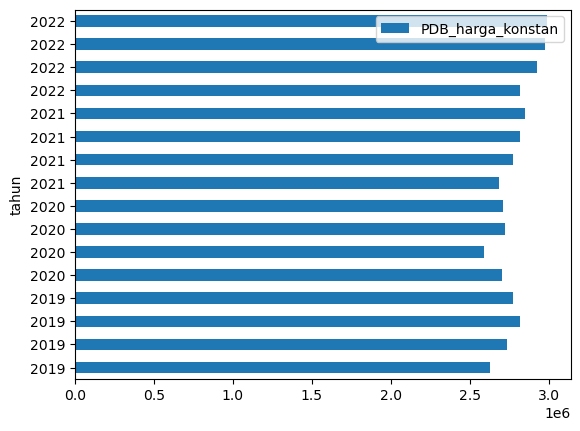

In [281]:
df_PDB_raw.plot(x="tahun", y="PDB_harga_konstan", kind="barh")

# **Feature Engineering**